In [2]:
# Import numpy for math operations and containers.
# Import matplotlib.pyplot for visual plotting.
# Import copy for copying.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# Define training data.

                       # [age, height cm]
trainingFeatures = np.array([[15, 50],
                            [20, 60],
                            [10, 100],
                            [10, 150],
                            [15, 80],
                            [15, 175],
                            [17, 150],
                            [20, 150],
                            [20, 175],
                            [22, 125],
                            [20, 100],
                            [13, 120],
                            [12, 140],
                            [12, 60],
                            [13, 70],
                            [22, 50],
                            [12, 110],
                            [18, 130],
                            [17, 170],
                            [10, 120],
                            [16, 100],
                            [18, 90],
                            [21, 90],
                            [18, 70],
                            [22, 160],
                            [18, 160],
                            [10, 80],
                            [18, 60],
                            [14, 110],
                            [19, 80],
                            [18, 50],
                            [15, 150],
                            [14, 160]])

                     # [bIsManly]
trainingResults = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])
"""
# Define training data.

                       # [age, height cm]
trainingFeatures = np.array([[15, 50],
                            [20, 50],
                            [10, 100],
                            [10, 150],
                            [15, 100],
                            [15, 175],
                            [17, 150],
                            [20, 150],
                            [20, 175],
                            [22, 125]])

                     # [bIsManly]
trainingResults = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
"""

'\n# Define training data.\n\n                       # [age, height cm]\ntrainingFeatures = np.array([[15, 50],\n                            [20, 50],\n                            [10, 100],\n                            [10, 150],\n                            [15, 100],\n                            [15, 175],\n                            [17, 150],\n                            [20, 150],\n                            [20, 175],\n                            [22, 125]])\n\n                     # [bIsManly]\ntrainingResults = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])\n'

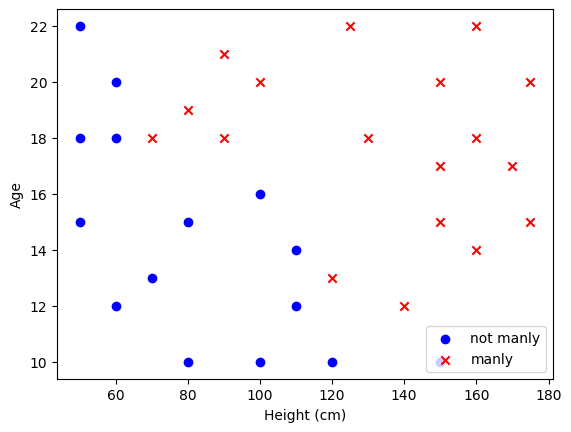

In [7]:
# Scatter plot the training data.

group0 = trainingFeatures[trainingResults == 0]
group1 = trainingFeatures[trainingResults == 1]

plt.scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
plt.scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

plt.ylabel('Age')
plt.xlabel('Height (cm)')
plt.legend(loc='lower right')

plt.show()

In [8]:
# Define sigmoid function.

def sigmoid(z):
    # input :
    # z [scalar] - Parameter for the sigmoid function.
    # returns :
    # [scalar] - Result of sigmoid function.
    
    return 1 / (1 + np.exp(-1 * z))

In [9]:
# Define prediction function.

def predict(X, w, b):
    # input :
    # X [ndarray : Shape(n,)] - Data with n features to predict result for.
    # w [ndarray : Shape(n,)] - Weights with n values required for proper prediction.
    # b [scalar] - Bias required for proper prediction.
    # returns:
    # [scalar] - Predicted outcome (chance for true).
    
    dotPlusb = np.dot(X, w) + b
    pred = sigmoid(dotPlusb)
    
    return pred

In [10]:
# Define loss function.

def loss(x, w, b, y):
    # input :
    # x [ndarray : Shape(n,)] - Data with n features to predict loss for.
    # w [ndarray : Shape(n,)] - Weights with n values used in finding loss for this given x data.
    # b [scalar] - Bias used in finding loss for this given x data.
    # y [scalar] - Proper result needed for calculating loss for given x.
    # returns:
    # [scalar] - Amount of loss for given x with given w and b.
    
    return (-1 * y * np.log(predict(x, w, b))) - ((1 - y) * np.log(1 - predict(x, w, b)))

In [11]:
# Define cost function.
# It's just a sum of losses divided by number of training examples.
# It's goal is to find how bad are the given weights and bias.

def compute_cost(X, w, b, Y):
    # input :
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns:
    # [scalar] - Cost for given weights and bias.
    
    # Get number of examples.
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        cost += loss(X[i], w, b, Y[i])
        
    cost /= m
    
    return cost

In [12]:
# Define gradient computation.

def compute_gradient(X, w, b, Y):
    # input:
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns: 
    # dj_dw [ndarray : Shape(n,)] - Gradient of current weights.
    # dj_db [scalar] - Gradient of current bias.
    
    # Get the shape of training data.
    m,n = X.shape
    
    # Init n weights with zeros.
    dj_dw = np.zeros((n,))
    
    # Init bias with 0.
    dj_db = 0
    
    # Loop over all examples.
    for i in range(m):
        
        err = predict(X[i], w, b) - Y[i]
        
        # Loop over all features.
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
            
        dj_db += err
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [13]:
def z_score_normalization(X):
    # params:
    # X [ndarray : Shape (n, m)] - Training dataset with multiple features.
    # returns:
    # X_norm [ndarray : Shape (n, m)] - Z-score normalized dataset.
    
    # Find mu and sigma.
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    # Use mu and sigma to do a element-based calculations to normalize whole dataset.
    X_norm = (X - mu) / sigma
    
    return X_norm

In [14]:
def polynomial_feature(X, degree):
    """
    Performs feature engineering by transforming the dataset into higher polynomial features.
    
    Args:
        X (ndarray): Input dataset with shape (n_samples, n_features).
        degree (int): Degree of the polynomial features.
        
    Returns:
        ndarray: Transformed dataset with shape (n_samples, n_new_features).
    """
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    return X_poly[:, 1:]  # Exclude the first column (bias term)

In [15]:
# Define training function.

def train_logistic_regression(X, Y, w_start, b_start, alpha, num_iter):
    # inputs:
    # X [ndarray : Shape(m,n)] - Training data.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # w_start [ndarray : Shape(n,)] - Starting weights.
    # b_start [scalar] - Starting bias.
    # alpha [scalar] - Step size.
    # num_iter [scalar] - Number of iterations.
    # returns:
    # weights [ndarray : Shape(n,)] - Trained weights for n-features.
    # bias [scalar] - Trained bias.
    # cost_history [ndarray : Shape(num_iter,)] - History of cost during training.
    
    weights = copy.deepcopy(w_start)
    bias = b_start
    cost_history = np.zeros((num_iter,))
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(X, weights, bias, Y)
        
        weights = weights - alpha * dj_dw
        bias = bias - alpha * dj_db
        cost_history[i] = compute_cost(X, weights, bias, Y)
        
        if(i % 100 == 0):
            print(f'Cost at iteration {i} : {cost_history[i]}')
    
    return weights, bias, cost_history

In [16]:
# Plot a decision boundary.

def plot_decision_boundary(degree, trained_weights, trained_bias):
    
    # Scatter plot the training data.
    group0 = trainingFeatures[trainingResults == 0]
    group1 = trainingFeatures[trainingResults == 1]

    plt.scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
    plt.scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

    plt.ylabel('Age')
    plt.xlabel('Height (cm)')
    plt.legend(loc='lower right')

    # Create a meshgrid of points.
    x1_min, x1_max = trainingFeatures[:, 0].min() - 1, trainingFeatures[:, 0].max() + 1
    x0_min, x0_max = trainingFeatures[:, 1].min() - 1, trainingFeatures[:, 1].max() + 1

    # Step size in the mesh.
    h = 0.05
    xx, yy = np.meshgrid(np.arange(x0_min, x0_max, h),
                         np.arange(x1_min, x1_max, h))

    # Flatten the meshgrid and transform it into feature vectors.
    X_mesh = np.c_[xx.ravel(), yy.ravel()]

    # Apply feature engineering to whole meshgrid.
    X_poly_mesh = polynomial_feature(X_mesh, degree)

    # Pass the feature vectors through the trained model to obtain predictions
    Z = predict(z_score_normalization(X_poly_mesh), trained_weights, trained_bias)

    # Reshape the predictions to match the shape of the meshgrid
    Z = Z.reshape(xx.shape)
    
    # contour_levels = [0.5]
    # levels=contour_levels
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.8)
    plt.colorbar()

    plt.show()

In [17]:
# Do the training.

degree = 4
trainigFeatures_poly = polynomial_feature(z_score_normalization(trainingFeatures), degree)

m = trainigFeatures_poly.shape[1]
weights_start = np.ones((m,))

# Perform training.
trained_weights, trained_bias, cost_history = train_logistic_regression(trainigFeatures_poly, trainingResults, weights_start, 1.0, 0.6, 5000)

print(f'found weights: {trained_weights}, found bias: {trained_bias}')

Cost at iteration 0 : 0.3221026674480752
Cost at iteration 100 : 0.14604617923223906
Cost at iteration 200 : 0.12299457713223534
Cost at iteration 300 : 0.10762643800964837
Cost at iteration 400 : 0.0962351468458198
Cost at iteration 500 : 0.08732659931718145
Cost at iteration 600 : 0.0801099658637658
Cost at iteration 700 : 0.07411310421400752
Cost at iteration 800 : 0.06903157928091556
Cost at iteration 900 : 0.06465814864331366
Cost at iteration 1000 : 0.06084601064304907
Cost at iteration 1100 : 0.057487968455580886
Cost at iteration 1200 : 0.05450378377726751
Cost at iteration 1300 : 0.05183204902369303
Cost at iteration 1400 : 0.049424712967126916
Cost at iteration 1500 : 0.04724329577638584
Cost at iteration 1600 : 0.045256306588509716
Cost at iteration 1700 : 0.04343757558177193
Cost at iteration 1800 : 0.04176522234067075
Cost at iteration 1900 : 0.040220963610766866
Cost at iteration 2000 : 0.03878954220661251
Cost at iteration 2100 : 0.03745819697445094
Cost at iteration 220

In [18]:
# Predict for training dataset.

m = trainingFeatures.shape[0]

trainingFeatures_norm = trainigFeatures_poly;

for i in range(m) :
    print(f"prediction for (age, height): ({trainingFeatures[i, 0]}, {trainingFeatures[i, 1]}): {predict(trainingFeatures_norm[i], trained_weights, trained_bias)}")

prediction for (age, height): (15, 50): 2.226396124413476e-10
prediction for (age, height): (20, 60): 0.011659013562605663
prediction for (age, height): (10, 100): 3.1037771823474135e-11
prediction for (age, height): (10, 150): 0.004717870940979982
prediction for (age, height): (15, 80): 0.002149659110158574
prediction for (age, height): (15, 175): 0.9978799419806491
prediction for (age, height): (17, 150): 0.9999126567625822
prediction for (age, height): (20, 150): 0.9999999941338564
prediction for (age, height): (20, 175): 0.9999999999988396
prediction for (age, height): (22, 125): 0.999673040742841
prediction for (age, height): (20, 100): 0.9998260394018046
prediction for (age, height): (13, 120): 0.8488979584935795
prediction for (age, height): (12, 140): 0.9998822303050697
prediction for (age, height): (12, 60): 1.4284229572911455e-13
prediction for (age, height): (13, 70): 8.371485425830211e-08
prediction for (age, height): (22, 50): 9.178215317657623e-22
prediction for (age, hei

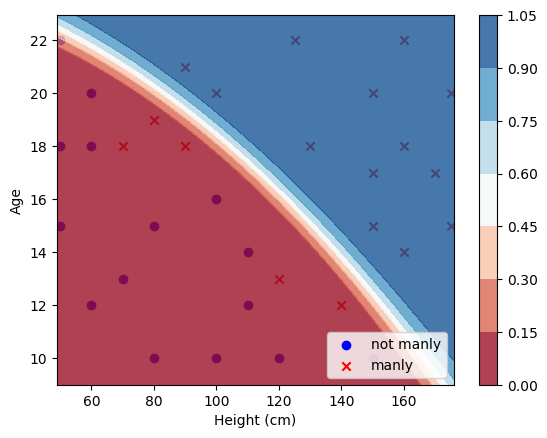

In [19]:
plot_decision_boundary(degree, trained_weights, trained_bias)